## 8-Queens

In [4]:
import random
import matplotlib.pyplot as plt


maxGeneration = 50
tournamentSize = 5
tournamentAmount = 30
mutationChance = 0.05

recording = {}

def generatePop():
    pop = [(random.randint(0,7),random.randint(0,7)) for i in range(8)]
    return pop

def checkIfPopValid(pop):
    seen = set()
    for coord in pop:
        if(coord in seen):
            return False
        seen.add(coord)
    return True

def calculateFitness(pop):
    fitness = 0
    board = [[True for i in range(8)] for j in range(8)]

    for queen in pop:
        #horizontal
        for x in range(8):
            if not board[x][queen[1]]:
                fitness -= 1
        #vertical
        for y in range(8):
            if not board[queen[0]][y]:
                fitness -= 1
        #diagonal
        i = 1
        while(8 > queen[0]+i and 8 > queen[1]+i):
            if not board[queen[0]+i][queen[1]+i]:
                fitness -=1
            i += 1
        i = 1
        while(0 <= queen[0]-i and 8 > queen[1]+i):
            if not board[queen[0]-i][queen[1]+i]:
                fitness -=1
            i += 1
        while(8 > queen[0]+i and 0 <= queen[1]-i):
            if not board[queen[0]+i][queen[1]-i]:
                fitness -=1
            i += 1
        i = 1
        while(0 <= queen[0]-i and 0 <= queen[1]-i):
            if not board[queen[0]-i][queen[1]-i]:
                fitness -=1
            i += 1
        #besetzt markieren
        board[queen[0]][queen[1]] = False
    return fitness

def tournament(contestants):
    highest = contestants[0]
    score = calculateFitness(highest)
    for contestant in contestants:
        if(calculateFitness(contestant) > score):
            highest = contestant
            score = calculateFitness(highest)
    return highest

def mate(parent1, parent2):
    child = []
    for i in range(8):
        if(random.randint(0,1) == 1):
            child.append( parent1[i])
        else:
            child.append( parent2[i])
    return child

def mutate(child):
    new_child = []
    for (x, y) in child:
        if random.random() < mutationChance:
            x += 1 if random.randint(0,1) == 1 else -1
        if random.random() < mutationChance:
            y += 1 if random.randint(0,1) == 1 else -1
        x = max(0, min(7, x))
        y = max(0, min(7, y))

        new_child.append((x, y))
    return new_child
        
def solveProblem():

    startingPop = [generatePop() for i in range(tournamentSize * tournamentAmount)]
    validPops = []

    for pop in startingPop:
        if(checkIfPopValid(pop)):
            validPops.append(pop)
    startingPop = validPops

    matingPool=[]

    solution = []

    for generation in range(maxGeneration):

        #check if starting pop is too small
        if(len(startingPop) < 2):
            print("startingPop too small")
            break

        #analize generation
        solved = False
        highest = calculateFitness(startingPop[0])
        highestPop = startingPop[0]
        for i in startingPop:
            if(calculateFitness(i) > highest):
                highest = calculateFitness(i)
                highestPop = i
            if(calculateFitness(i) >= 0):
                print("Problem solved: ", i)
                solved = True
    
        recording[generation] = highest
        if(solved):
            break
        else:
            print("Generation ", generation, ": ", len(startingPop), " population. Highest fitness: ", highest, "best pop: ", highestPop)

        #do tournaments
        matingPool = []
        for j in range(tournamentAmount):
            contestants = []
            for i in range(tournamentSize):
                contestants.append(random.choice(startingPop))
                matingPool.append(tournament(contestants))
    
        #mating & mutation
        matingAmount = tournamentSize * tournamentAmount

        startingPop = []
        for i in range(matingAmount):
            newChild = mutate(mate(random.choice(matingPool), random.choice(matingPool)))
            if(checkIfPopValid(newChild)):
                startingPop.append(newChild)







Generation  0 :  92  population. Highest fitness:  -3 best pop:  [(4, 0), (6, 7), (1, 2), (2, 4), (6, 1), (7, 1), (3, 6), (0, 5)]
Generation  1 :  118  population. Highest fitness:  -4 best pop:  [(5, 7), (6, 5), (0, 0), (3, 3), (2, 1), (1, 4), (3, 4), (7, 2)]
Generation  2 :  115  population. Highest fitness:  -3 best pop:  [(6, 3), (2, 5), (7, 6), (5, 6), (0, 4), (6, 2), (3, 7), (1, 1)]
Generation  3 :  120  population. Highest fitness:  -4 best pop:  [(6, 4), (2, 4), (1, 2), (5, 2), (6, 7), (7, 1), (3, 6), (0, 5)]
Generation  4 :  124  population. Highest fitness:  -4 best pop:  [(5, 1), (6, 0), (7, 5), (2, 3), (1, 0), (5, 5), (0, 7), (3, 6)]
Generation  5 :  125  population. Highest fitness:  -4 best pop:  [(6, 6), (2, 0), (1, 2), (5, 1), (6, 7), (7, 1), (4, 6), (0, 5)]
Generation  6 :  128  population. Highest fitness:  -4 best pop:  [(4, 0), (6, 7), (3, 2), (5, 2), (2, 0), (7, 1), (3, 6), (0, 5)]
Generation  7 :  138  population. Highest fitness:  -3 best pop:  [(6, 6), (3, 0), (

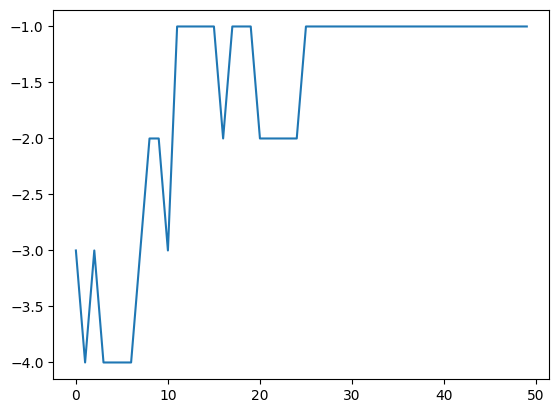

In [5]:
solveProblem()

print(recording)

generations = list(recording.keys())
fitness = list(recording.values())

plt.plot(generations, fitness)
plt.show()

In [12]:
maxGeneration = 50
tournamentSize = 10
tournamentAmount = 30
mutationChance = 0.1



genAmount = 0
avrFitness = 0
for i in range(100):
    recording = {}
    solveProblem()
    generations = list(recording.keys())
    fitness = list(recording.values())
    genAmount += len(generations)
    avrFitness += fitness[-1]
    

print(genAmount /100, avrFitness / 100)

Generation  0 :  187  population. Highest fitness:  -4 best pop:  [(2, 0), (7, 2), (4, 7), (5, 4), (3, 3), (6, 0), (0, 7), (2, 6)]
Generation  1 :  219  population. Highest fitness:  -2 best pop:  [(7, 2), (2, 1), (5, 7), (3, 4), (0, 5), (6, 3), (1, 5), (4, 4)]
Generation  2 :  239  population. Highest fitness:  -2 best pop:  [(7, 2), (2, 1), (5, 7), (3, 4), (0, 5), (6, 3), (1, 5), (4, 4)]
Generation  3 :  231  population. Highest fitness:  -3 best pop:  [(4, 0), (3, 1), (0, 2), (7, 6), (2, 7), (1, 2), (5, 5), (4, 4)]
Generation  4 :  223  population. Highest fitness:  -3 best pop:  [(5, 0), (1, 5), (5, 7), (7, 6), (0, 1), (6, 3), (3, 7), (4, 4)]
Generation  5 :  243  population. Highest fitness:  -2 best pop:  [(6, 2), (2, 1), (5, 3), (6, 7), (0, 5), (1, 0), (3, 6), (7, 4)]
Generation  6 :  233  population. Highest fitness:  -3 best pop:  [(4, 0), (1, 5), (5, 7), (6, 7), (0, 1), (2, 0), (3, 6), (7, 4)]
Generation  7 :  255  population. Highest fitness:  -3 best pop:  [(7, 2), (3, 1), 